# Hello Quantum

This application first entangles two qubits which were initially in the state $\vert00\rangle$. Then, we noted the results by running the application on a simulator as well as real quantum hardware at IBM.

## Prerequisites

- [Python 3](https://www.python.org/downloads/)
- [Qiskit](https://qiskit.org)
- [IBMQ API token](https://quantum-computing.ibm.com)

## Build the Circuit

Import Qiskit:

In [1]:
from qiskit import *
from qiskit import IBMQ
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

%matplotlib inline

In [2]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.14.2',
 'qiskit-aer': '0.5.2',
 'qiskit-ignis': '0.3.3',
 'qiskit-ibmq-provider': '0.7.2',
 'qiskit-aqua': '0.7.3',
 'qiskit': '0.19.6'}

Initialize two qubits into a `QuantumRegister` and two classical bits into a `ClassicalRegister`:

In [3]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

Build a `QuantumCircuit` composed of the two classical and quantum bits:

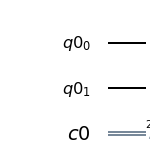

In [4]:
circuit = QuantumCircuit(qr, cr)
circuit.draw(output='mpl')

Add the [Hadamard gate](https://quantum-computing.ibm.com/docs/iqx/q-gates#h-gate):

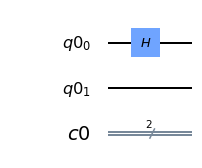

In [5]:
circuit.h(qr[0]) # Hadamard gate
circuit.draw(output='mpl')

Add the [controlled-X gate](https://quantum-computing.ibm.com/docs/iqx/q-gates#cx-gate):

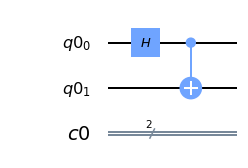

In [6]:
circuit.cx(qr[0], qr[1]) # control, target
circuit.draw(output='mpl')

Add the [measurement gate](https://quantum-computing.ibm.com/docs/iqx/q-gates#measurement):

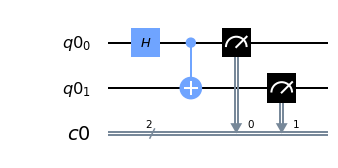

In [7]:
circuit.measure(qr, cr) # qubits are measured and results are stored in classical bits in order
circuit.draw(output='mpl')

## Run on Simulator

Set the simulator to `qasm_simulator` from the Aer element of Qiskit:

In [8]:
simulator = Aer.get_backend('qasm_simulator')

Execute the circuit and store the results:

In [9]:
result = execute(circuit, backend=simulator).result()

Plot results:

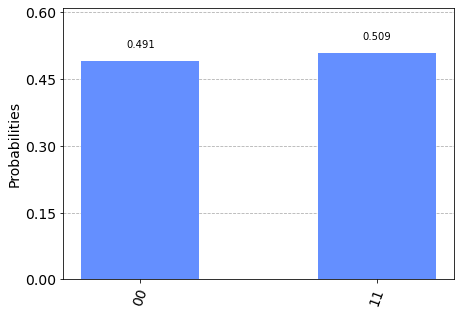

In [10]:
plot_histogram(result.get_counts(circuit))

## Run on Real Quantum Hardware

Setup IBMQ account:

In [11]:
# IBMQ.save_account('<IBMQ_API_TOKEN>')
IBMQ.load_account()

provider = IBMQ.get_provider(hub = 'ibm-q')

Get the least busy device:

In [12]:
num_qubits = 2

from qiskit.providers.ibmq import least_busy
possible_devices = provider.backends(filters=lambda x: 
                                     x.configuration().n_qubits >= num_qubits
                                       and 
                                     x.configuration().simulator == False)
qcomp = least_busy(possible_devices)

Execute the circuit:

In [13]:
job = execute(circuit, backend=qcomp)

Monitor the job progress:

In [14]:
job_monitor(job)

Job Status: job has successfully run


Plot results:

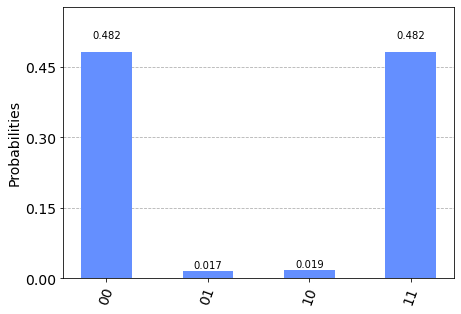

In [15]:
result = job.result()
plot_histogram(result.get_counts(circuit))